### Importing Required Libraries

#### Import necessary libraries for data handling, image processing, model building, and visualization.

In [1]:
import numpy as np
import os
import random
import cv2
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [55]:
warnings.filterwarnings('ignore')

### Defining Parameters and Dataset Classes

#### Specify the dataset directory, image size, and class labels.

In [85]:
data_dir = 'lung_cancer'
img_size = 256
classes = ['Benign cases', 'Malignant cases', 'Normal cases']

### Loading and Preprocessing Data

#### Define a function to load images, resize them, and associate them with their respective labels.
#### Handle any errors during data loading

In [87]:
def load_data():
    dataset = []
    for category in classes:
        folder_path = os.path.join(data_dir, category)
        class_label = classes.index(category)
        for img_file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_file)
            try:
                img = cv2.imread(img_path)
                resized_img = cv2.resize(img, (img_size, img_size))
                if resized_img is not None:
                    dataset.append([resized_img, class_label])
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
    return dataset


In [89]:
data = load_data()

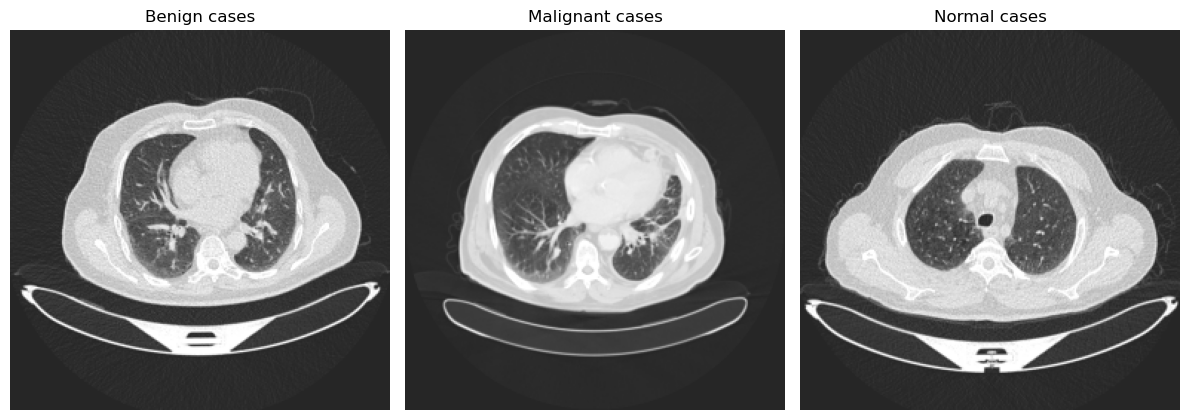

In [113]:
def display_sample_images():
    plt.figure(figsize=(12, 6))
    for idx, category in enumerate(classes):
        # Find the first image for the category
        for img, label in data:
            if label == idx:
                plt.subplot(1, len(classes), idx + 1)
                plt.imshow(img.astype("uint8"))  # Convert back to integer format for display
                plt.title(category)
                plt.axis("off")
                break
    plt.tight_layout()
    plt.show()

display_sample_images()

### Preparing Features and Labels

#### Extract image data and labels from the dataset and normalize the feature values.
#### Convert labels to one-hot encoding for multi-class classification.

In [90]:
features = [item[0] for item in data]
labels = [item[1] for item in data]

In [91]:
X = np.array(features, dtype='float32') / 255.0
Y = np.array(labels, dtype='int')
Y = to_categorical(Y, num_classes=len(classes))

### Splitting Data into Train and Test Sets

#### Divide the dataset into training and testing subsets using an 80-20 split.

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Applying Data Augmentation

#### Create an instance of ImageDataGenerator to perform data augmentation, such as rotations, shifts, and zooming.

In [93]:
datagen = ImageDataGenerator(
    rotation_range=5,  
    width_shift_range=0.05, 
    height_shift_range=0.05,
    zoom_range=0.05,
)
datagen.fit(X_train)

### Building the Convolutional Neural Network (CNN) Model

In [94]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.5), 
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'), 
    Dropout(0.5),  
    Dense(len(classes), activation='softmax')
])

### Compiling the Model

#### Set the optimizer, loss function, and evaluation metrics for the model.

In [95]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

### Training the Model

#### Train the CNN using the training data, with validation on the test data.
#### Implement early stopping to avoid overfitting.

In [96]:
history = model.fit(
    X_train, Y_train, 
    validation_data=(X_test, Y_test), 
    epochs=10,  
    batch_size=32,  
    callbacks=[early_stopping]
)

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 21s 603ms/step - accuracy: 0.4527 - loss: 2.5162 - val_accuracy: 0.5409 - val_loss: 1.0484
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 15s 549ms/step - accuracy: 0.6031 - loss: 0.8280 - val_accuracy: 0.6773 - val_loss: 0.9561
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 14s 503ms/step - accuracy: 0.7176 - loss: 0.6734 - val_accuracy: 0.7455 - val_loss: 0.6722
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 15s 542ms/step - accuracy: 0.7617 - loss: 0.5367 - val_accuracy: 0.8591 - val_loss: 0.4697
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 15s 514ms/step - accuracy: 0.8364 - loss: 0.3818 - val_accuracy: 0.9227 - val_loss: 0.2804
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 15s 523ms/step - accuracy: 0.8830 - loss: 0.2652 - val_accuracy: 0.9500 - val_loss: 0.2286
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 15s 533ms/step - accuracy: 0.8846 - loss: 0.2513 - val_accuracy: 0.9773 - val_loss: 0.1736
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 15s 515ms/step - accuracy: 0.9158 - loss: 0.1915 - val_accu

### Evaluating the Model

#### Evaluate the model’s performance on training and testing datasets.
#### Display accuracy and loss for both train and test data.

In [105]:
train_loss, train_accuracy = model.evaluate(X_train, Y_train, verbose=0)
val_loss, val_accuracy = model.evaluate(X_test, Y_test, verbose=0)

In [106]:
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Validation Accuracy: {val_accuracy:.2f}")

Train Accuracy: 0.99
Validation Accuracy: 0.97


### Visualizing Training and Validation Metrics

#### Plot the training and validation accuracy and loss to analyze the model's performance over epochs.

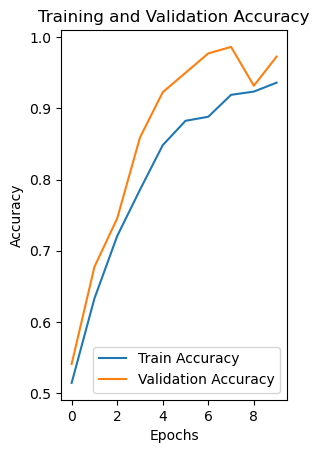

In [109]:
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

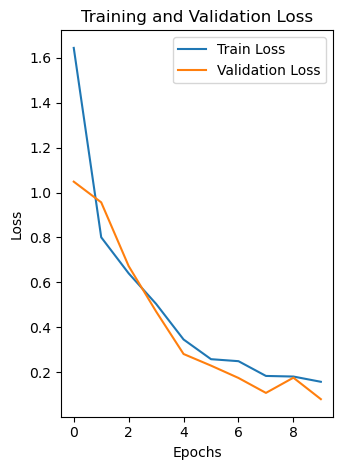

In [111]:
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()